<a href="https://colab.research.google.com/github/GIlbertoRSilva/DepressionRisk-ML/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise Exploratória de Dados (EDA)
## Projeto: Classificação do Risco de Depressão

Este notebook realiza a Análise Exploratória de Dados (EDA) do dataset [student_depression_dataset.csv](https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset), um Conjunto de dados sobre depressão estudantil dipnivel no Kaggle.

Objetivos:

- Entender a estrutura do dataset  
- Identificar problemas (valores faltantes, erros, outliers, inconsistências)  
- Avaliar padrões e estatísticas  
- Definir todas as regras que irão para o `preprocess.py`  

Imports

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set(style="whitegrid", palette="viridis")


Carragamento de dados

In [44]:
df = pd.read_csv("../data/raw/student_depression_dataset.csv")
df.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


Visão Geral do Dataset

O dataset possi um total de 27901 amostras, 17 features de input e 1 feature target "Depression". As categorias são consistentes e os atibutos estão com tipos corretos, salvo: Sleep Duration e Study Hour. Ambas estão como objeto, representando intervalos discretos ao invés de números. O dataset não possui valores nulos





In [45]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

(27901, 18)

In [46]:
df.dtypes


id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [47]:
df.isna().sum()


id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

Estatisticas Descritivas

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,27901.0,70442.149421,40641.175216,2.0,35039.00,70684.00,105818.00,140699.0
Age,27901.0,25.822300,4.905687,18.0,21.00,25.00,30.00,59.0
Academic Pressure,27901.0,3.141214,1.381465,0.0,2.00,3.00,4.00,5.0
Work Pressure,27901.0,0.000430,0.043992,0.0,0.00,0.00,0.00,5.0
CGPA,27901.0,7.656104,1.470707,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27901.0,2.943837,1.361148,0.0,2.00,3.00,4.00,5.0
Job Satisfaction,27901.0,0.000681,0.044394,0.0,0.00,0.00,0.00,4.0
Work/Study Hours,27901.0,7.156984,3.707642,0.0,4.00,8.00,10.00,12.0
Depression,27901.0,0.585499,0.492645,0.0,0.00,1.00,1.00,1.0


In [49]:
df.describe(include=['object']).T


,count,unique,top,freq
Gender,27901,2,Male,15547
City,27901,52,Kalyan,1570
Profession,27901,14,Student,27870
Sleep Duration,27901,5,'Less than 5 hours',8310
Dietary Habits,27901,4,Unhealthy,10317
Degree,27901,28,'Class 12',6080
Have you ever had suicidal thoughts ?,27901,2,Yes,17656
Financial Stress,27901,6,5.0,6715
Family History of Mental Illness,27901,2,No,14398


In [50]:
#Valores Unicos em cada coluna

for col in df.columns:
  print(f'Coluna: {col}')
  print(df[col].unique())
  print("-"*30)

Coluna: id
[     2      8     26 ... 140689 140690 140699]
------------------------------
Coluna: Gender
['Male' 'Female']
------------------------------
Coluna: Age
[33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
------------------------------
Coluna: City
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']
------------------------------
Coluna: Profession
['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "

In [ ]:
df = df.fillna(0)
df.info()

Detecção de inconsistências

In [51]:
#Duplicatas

df.duplicated().sum()


np.int64(0)

Análise de Variáveis categóricas

Gender
Male      15547
Female    12354
Name: count, dtype: int64


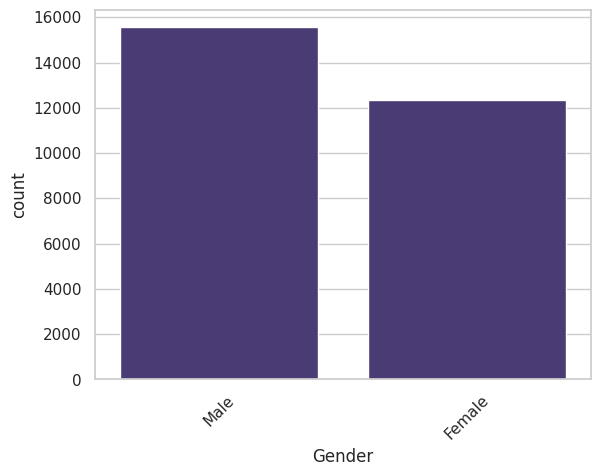

City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                   934
Chennai                  885
Meerut                   825
Rajkot                   816
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 694
Varanasi                 685
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik                   547
Faridabad                461
Saanvi                     2
Bhavna                     2
City                       2
Harsha                     2
'Less Del

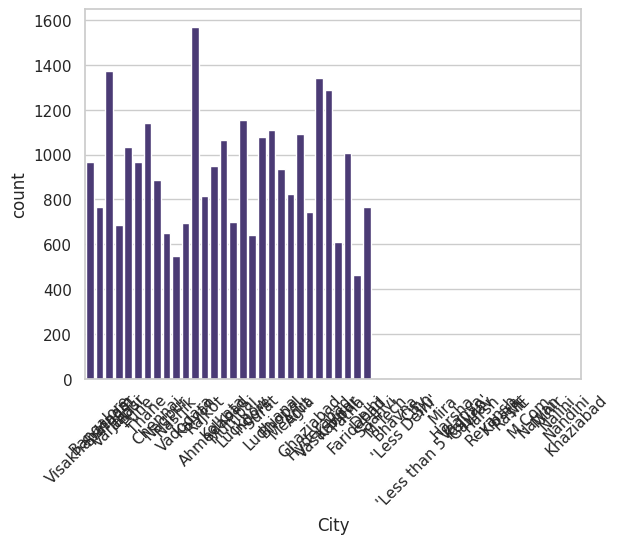

Profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
Chef                            2
'Content Writer'                2
Pharmacist                      2
Doctor                          2
'UX/UI Designer'                1
'Civil Engineer'                1
Manager                         1
'Educational Consultant'        1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64


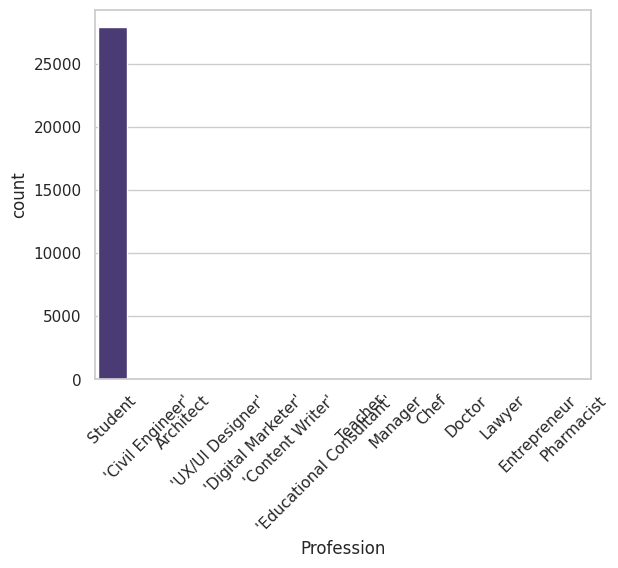

Sleep Duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64


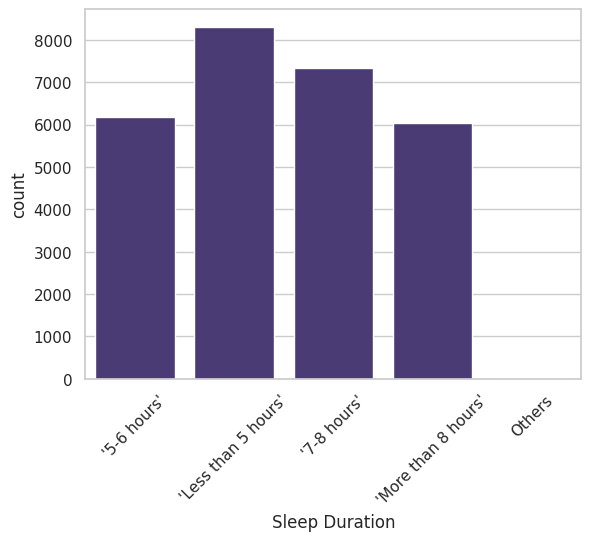

Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64


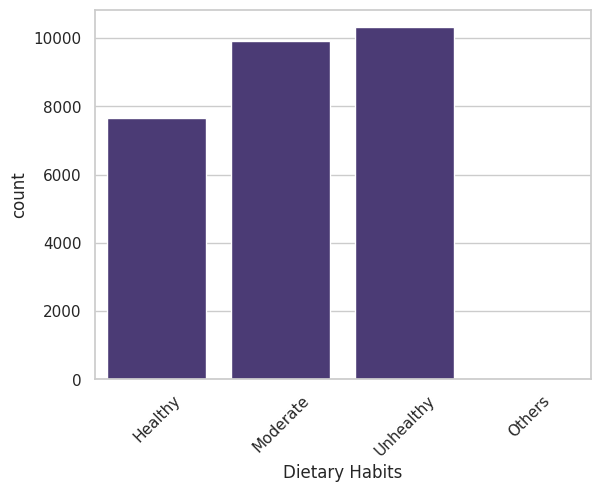

Degree
'Class 12'    6080
B.Ed          1867
B.Com         1506
B.Arch        1478
BCA           1433
MSc           1190
B.Tech        1152
MCA           1044
M.Tech        1022
BHM            925
BSc            888
M.Ed           821
B.Pharm        810
M.Com          734
BBA            696
MBBS           696
LLB            671
BE             613
BA             600
M.Pharm        582
MD             572
MBA            562
MA             544
PhD            522
LLM            482
MHM            191
ME             185
Others          35
Name: count, dtype: int64


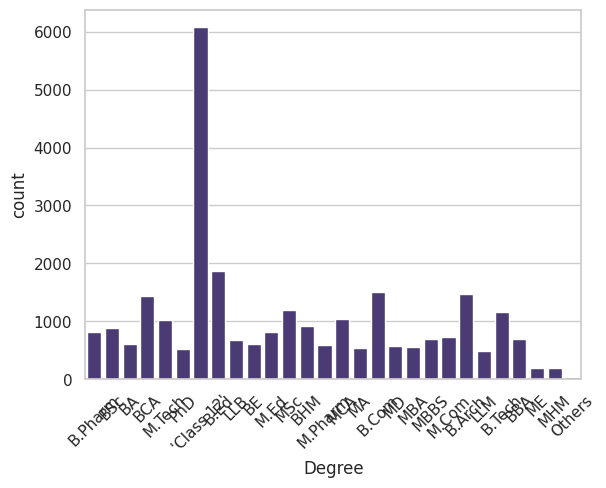

Have you ever had suicidal thoughts ?
Yes    17656
No     10245
Name: count, dtype: int64


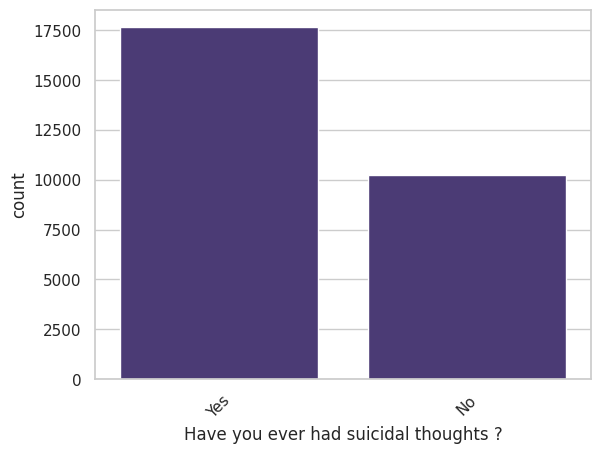

Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
?         3
Name: count, dtype: int64


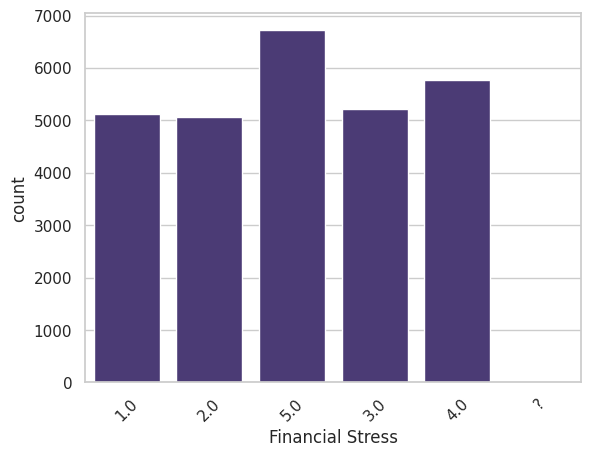

Family History of Mental Illness
No     14398
Yes    13503
Name: count, dtype: int64


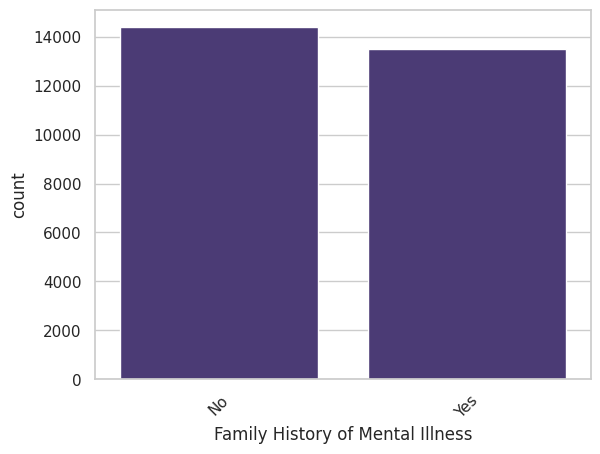

In [52]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(df[col].value_counts())
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.show()


Análise das Variáveis numéricas

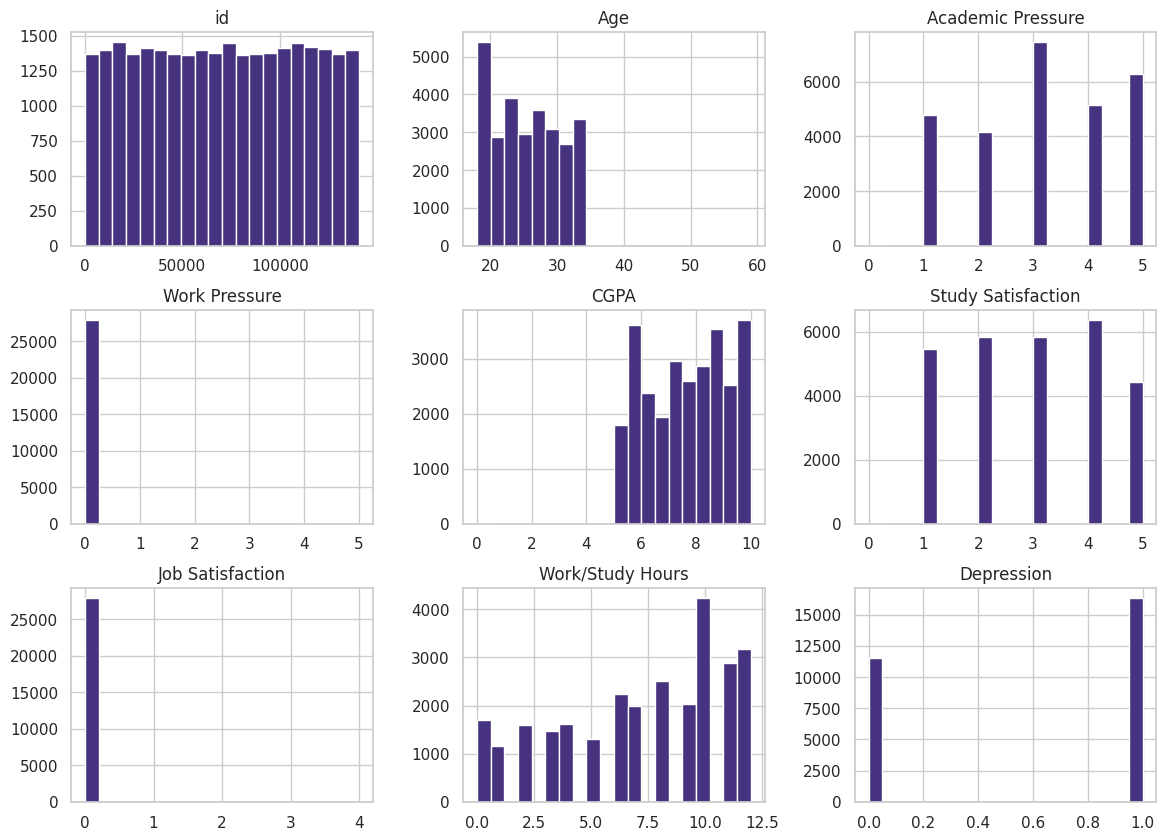

In [53]:
df.hist(figsize=(14,10), bins=20)
plt.show()


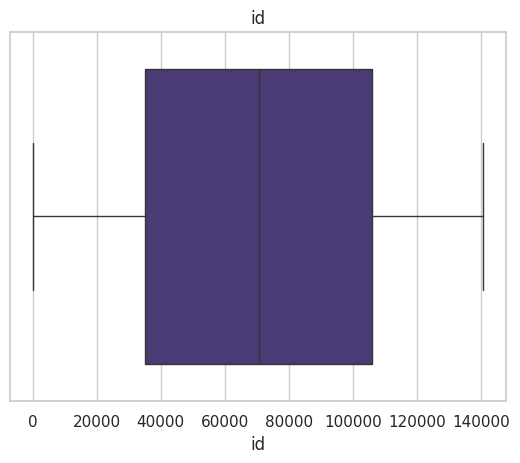

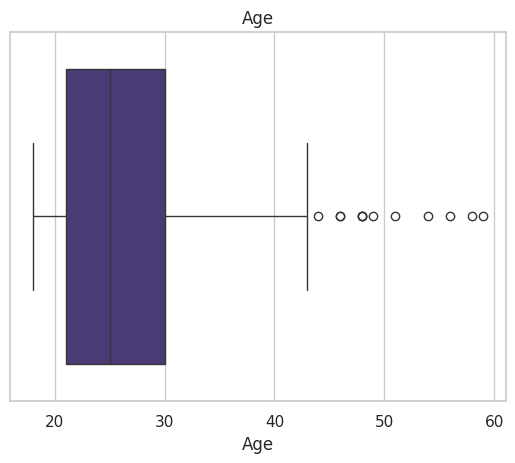

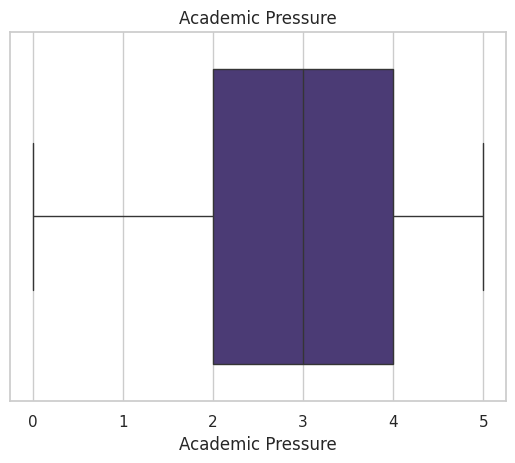

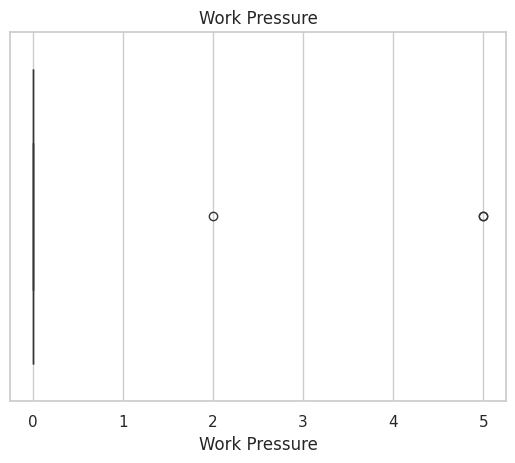

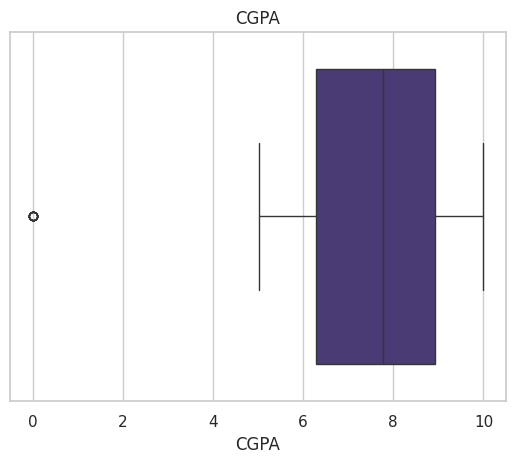

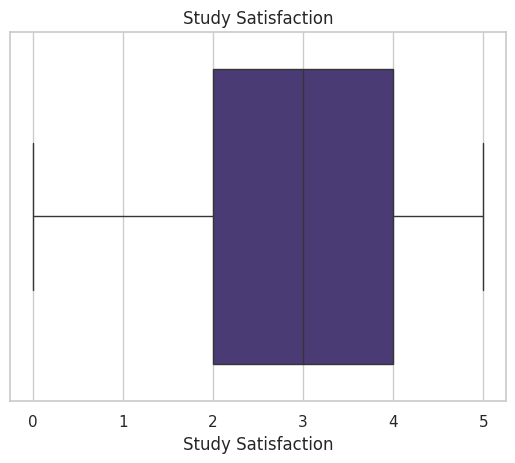

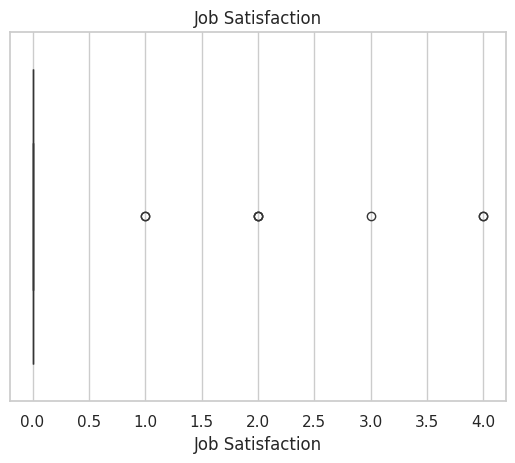

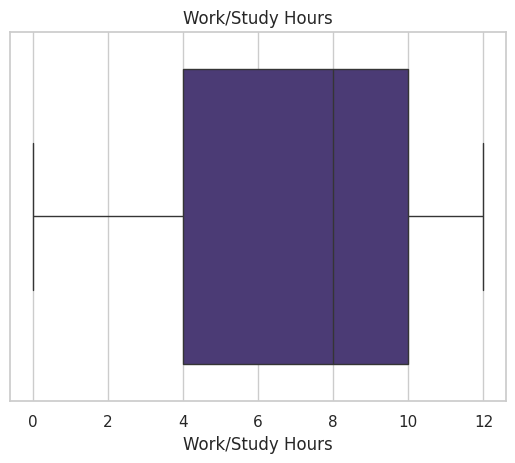

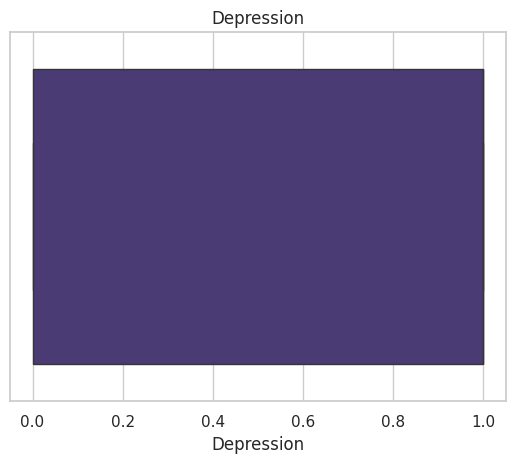

In [54]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


Variável Target

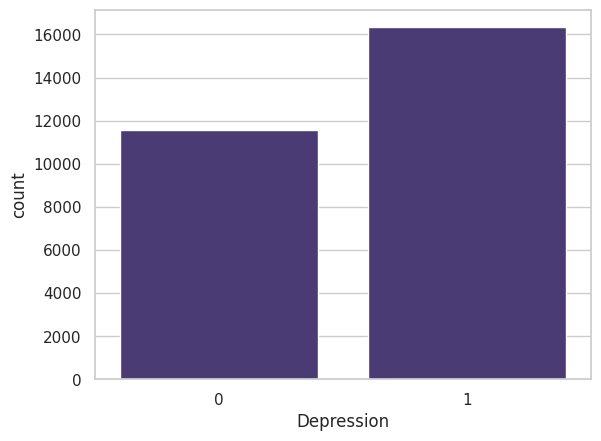

In [55]:
sns.countplot(data=df, x="Depression")
plt.show()


In [56]:
df["Depression"].value_counts(normalize=True)


Depression
1    0.585499
0    0.414501
Name: proportion, dtype: float64

Correlação das váriáveis

In [57]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


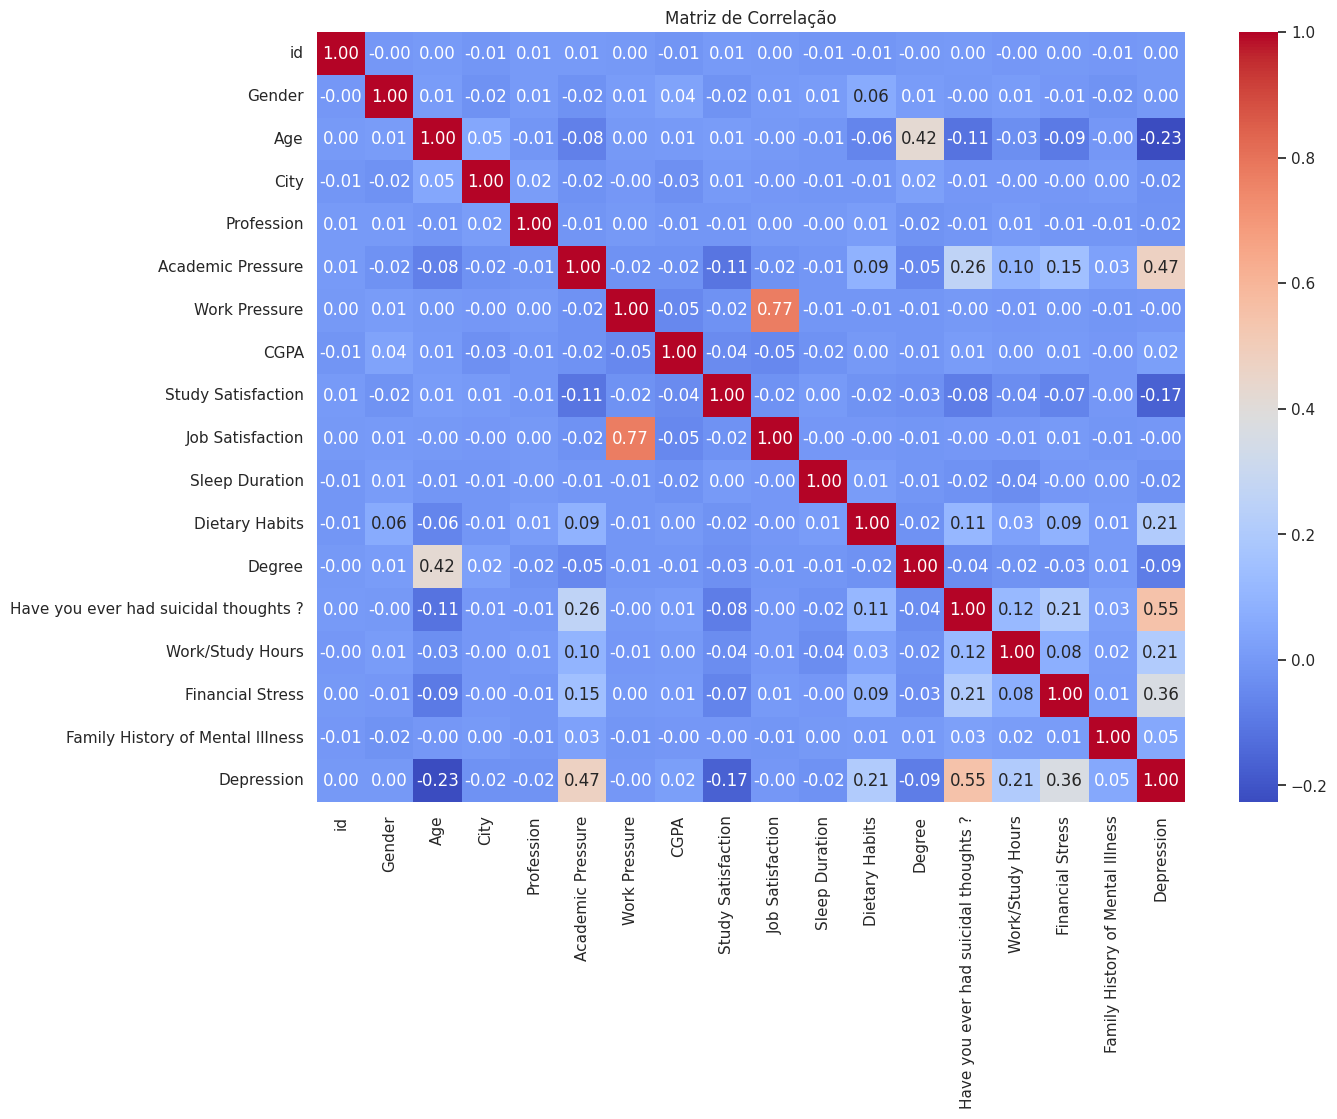

In [58]:

plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()


In [59]:
df_encoded.corr()["Depression"].sort_values(ascending=False)


Depression                               1.000000
Have you ever had suicidal thoughts ?    0.546277
Academic Pressure                        0.474835
Financial Stress                         0.363382
Work/Study Hours                         0.208563
Dietary Habits                           0.206605
Family History of Mental Illness         0.053430
CGPA                                     0.022210
Gender                                   0.001794
id                                       0.000923
Work Pressure                           -0.003351
Job Satisfaction                        -0.003482
Profession                              -0.016997
Sleep Duration                          -0.022411
City                                    -0.024412
Degree                                  -0.086890
Study Satisfaction                      -0.167971
Age                                     -0.226422
Name: Depression, dtype: float64

Relações importantes entre variáveis

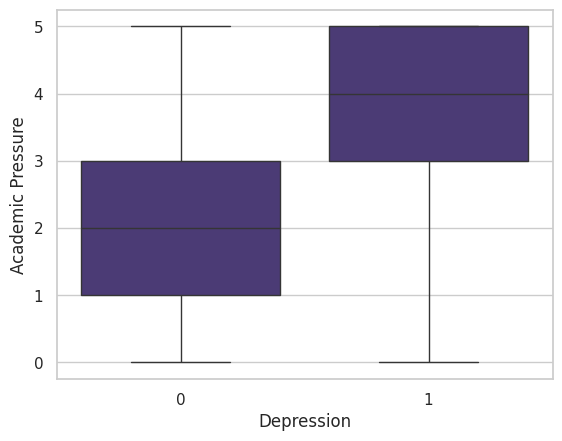

In [60]:
sns.boxplot(data=df, x="Depression", y="Academic Pressure")
plt.show()


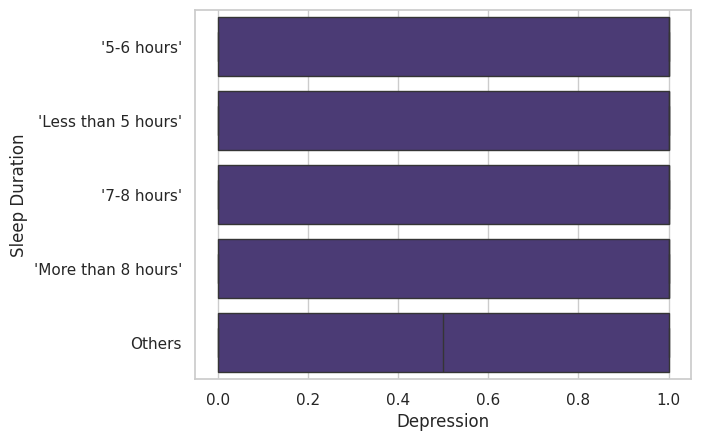

In [42]:
sns.boxplot(data=df, x="Depression", y="Sleep Duration")
plt.show()


Ideias de engenharia de atributos 

- Criar feature Total_Stress = Academic Pressure + Financial Stress
- Criar Burnout_Index = Total_Stress + (5 - Study Satisfaction)
- Criar Sleep_Score baseada nos intervalos de Sleep Duration

Lista Final de Problemas Detectados

- Colunas inúteis: id, Gender, City, Profession, Degree, Job Satisfaction, Work Pressure
- Valores inconsistentes em [Sleep Duration:'Others'] [Dietary Habits 'Others'] [Financial Stress '?']
- Idades fora da faixa típica (> 45)
- Desbalanceamento na variável Depression
- Categorias string que precisam virar número

# Conclusão Final

A EDA permitiu:

- entender a estrutura do dataset
- detectar problemas e inconsistências
- identificar relações importantes entre variáveis
- planejar o pré-processamento completo
- fundamentar todo o pipeline e os modelos futuros

Agora temos informação suficiente para construir o preprocess.py.
